In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")

In [3]:
X = df.iloc[:, 1:53]
X.head()



,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [4]:
X['January'] = X['W0'] + X['W1'] + X['W2'] + X['W3'] + X['W4']/2
X['February'] = X['W5'] + X['W6'] + X['W7'] + X['W8'] + X['W4']/2
X['March'] = X['W9'] + X['W10'] + X['W11'] + X['W12'] + X['W13']/2
X['April'] = X['W14'] + X['W15'] + X['W15'] + X['W17'] + X['W13']/2
X['May'] = X['W18'] + X['W19'] + X['W20'] + X['W21'] + X['W22']/2
X['June'] = X['W23'] + X['W4'] + X['W25'] + X['W26'] + X['W22']/2
X['July'] = X['W27'] + X['W28'] + X['W29'] + X['W30'] + X['W31']/2
X['August'] = X['W32'] + X['W33'] + X['W34'] + X['W35'] + X['W31']/2
X['September'] = X['W36'] + X['W37'] + X['W38'] + X['W39'] + X['W40']/2
X['October'] = X['W41'] + X['W42'] + X['W42'] + X['W44']+ X['W40']/2
X['November'] = X['W45'] + X['W46'] + X['W47'] + X['W48'] + X['W49']/2
X['December'] = X['W49'] + X['W50'] + X['W51'] + X['W49'] + X['W0']/2

dataMonth = X
dataMonth = dataMonth.iloc[:, 52:105]
dataMonth


,January,February,March,April,May,June,July,August,September,October,November,December
0,47.5,59.5,59.5,40.5,34.5,44.5,38.0,42.0,51.5,30.5,35.0,32.5
1,21.5,16.5,14.0,20.0,28.0,20.0,21.5,18.5,18.0,15.0,11.5,11.5
2,40.0,45.0,36.5,42.5,42.5,45.5,36.5,35.5,40.5,23.5,38.0,34.5
3,42.5,45.5,30.0,40.0,37.5,37.5,26.0,42.0,36.0,33.0,36.0,37.0
4,40.0,42.0,48.0,46.0,41.0,40.0,31.5,27.5,27.5,31.5,34.5,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...
806,1.0,3.0,2.0,3.0,0.0,1.0,2.0,0.0,3.5,1.5,1.0,2.0
807,1.5,10.5,5.0,8.0,7.0,9.0,10.5,14.5,18.0,20.0,18.5,21.0
808,1.5,5.5,1.0,0.0,1.0,1.0,1.0,1.0,0.0,5.0,4.0,7.5
809,1.0,1.0,0.0,0.0,1.5,2.5,2.5,2.5,0.0,0.0,2.0,2.0


In [5]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(dataMonth))
scaled_data.columns = dataMonth.columns

In [6]:
scaled_data

,January,February,March,April,May,June,July,August,September,October,November,December
0,0.099199,0.280313,0.269408,-0.071449,-0.166939,0.086224,0.105436,0.139883,0.315876,-0.143133,-0.082015,-0.162732
1,-0.363570,-0.465726,-0.512417,-0.416311,-0.279228,-0.408644,-0.267029,-0.362844,-0.384771,-0.457606,-0.555676,-0.618833
2,-0.034292,0.028742,-0.125800,-0.037804,-0.028735,0.106423,0.071576,0.000831,0.085813,-0.285153,-0.021548,-0.119294
3,0.010205,0.037416,-0.237489,-0.079860,-0.115112,-0.055167,-0.165447,0.139883,-0.008304,-0.092412,-0.061859,-0.064997
4,-0.034292,-0.023308,0.071804,0.021075,-0.054649,-0.004670,-0.041292,-0.170310,-0.186080,-0.122845,-0.092093,0.065318
...,...,...,...,...,...,...,...,...,...,...,...,...
806,-0.728446,-0.699948,-0.718613,-0.702293,-0.762939,-0.792420,-0.707215,-0.758607,-0.688037,-0.731502,-0.767312,-0.825164
807,-0.719547,-0.569825,-0.667064,-0.618181,-0.642011,-0.630830,-0.515339,-0.448414,-0.384771,-0.356163,-0.414585,-0.412502
808,-0.719547,-0.656574,-0.735796,-0.752761,-0.745664,-0.792420,-0.729788,-0.737215,-0.761239,-0.660492,-0.706844,-0.705709
809,-0.728446,-0.734648,-0.752979,-0.752761,-0.737026,-0.762122,-0.695928,-0.705126,-0.761239,-0.761935,-0.747156,-0.825164


# K-Means

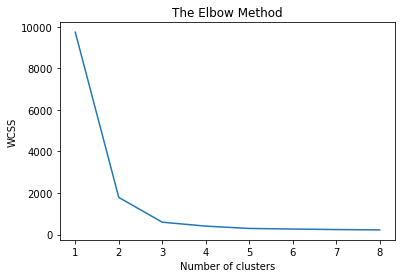

In [7]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_data)

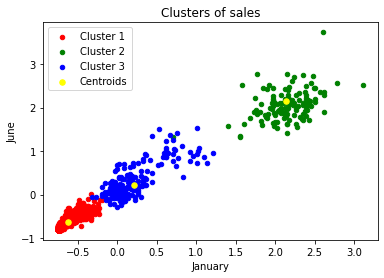

In [9]:
plt.scatter(scaled_data[y_kmeans == 0]['January'], scaled_data[y_kmeans == 0]['June'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_data[y_kmeans == 1]['January'], scaled_data[y_kmeans == 1]['June'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_data[y_kmeans == 2]['January'], scaled_data[y_kmeans == 2]['June'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('January')
plt.ylabel('June')
plt.legend()
plt.show()

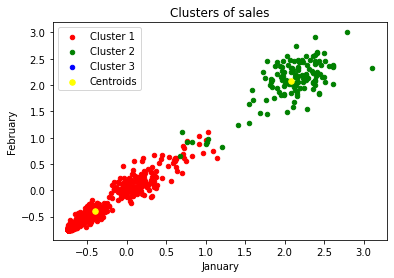

In [30]:
plt.scatter(scaled_data[y_kmeans == 0]['January'], scaled_data[y_kmeans == 0]['February'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_data[y_kmeans == 1]['January'], scaled_data[y_kmeans == 1]['February'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_data[y_kmeans == 2]['January'], scaled_data[y_kmeans == 2]['February'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('January')
plt.ylabel('February')
plt.legend()
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_data)

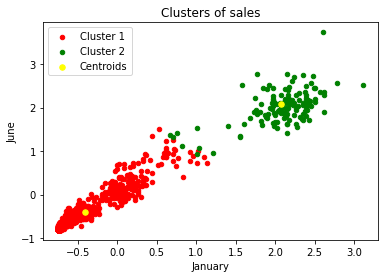

In [12]:
plt.scatter(scaled_data[y_kmeans == 0]['January'], scaled_data[y_kmeans == 0]['June'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_data[y_kmeans == 1]['January'], scaled_data[y_kmeans == 1]['June'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('January')
plt.ylabel('June')
plt.legend()
plt.show()

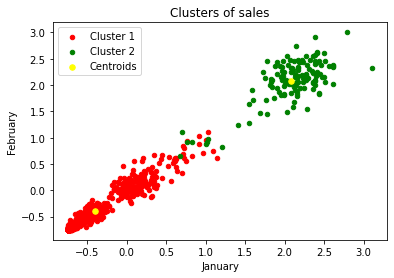

In [29]:
plt.scatter(scaled_data[y_kmeans == 0]['January'], scaled_data[y_kmeans == 0]['February'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_data[y_kmeans == 1]['January'], scaled_data[y_kmeans == 1]['February'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('January')
plt.ylabel('February')
plt.legend()
plt.show()

# DBSCAN

In [14]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
Xdb = StandardScaler().fit_transform(dataMonth)
Xdb

array([[ 0.0991994 ,  0.28031301,  0.26940821, ..., -0.14313332,
        -0.08201493, -0.1627323 ],
       [-0.3635702 , -0.46572649, -0.51241695, ..., -0.45760636,
        -0.55567602, -0.61883264],
       [-0.03429183,  0.02874155, -0.12580011, ..., -0.2851534 ,
        -0.02154756, -0.11929417],
       ...,
       [-0.71954681, -0.6565738 , -0.73579556, ..., -0.66049218,
        -0.70684446, -0.7057089 ],
       [-0.72844623, -0.73464771, -0.75297853, ..., -0.7619351 ,
        -0.74715604, -0.82516375],
       [-0.72844623, -0.75199746, -0.75297853, ..., -0.7517908 ,
        -0.78746762, -0.84688281]])

In [15]:
# To determine eps
range_eps=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
for i in range_eps:
    print ("eps values is: " + str(i))
    db = DBSCAN(eps=i, min_samples=4).fit(Xdb)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhouette_avg= silhouette_score(Xdb,labels)
    print("EPS: "+str(i)+" Avgerage silhouette score:"+str(silhouette_avg))

eps values is: 0.1
{0, -1}
EPS: 0.1 Avgerage silhouette score:0.11885801712421708
eps values is: 0.2
{0, 1, 2, -1}
EPS: 0.2 Avgerage silhouette score:0.08653765948358699
eps values is: 0.3
{0, -1}
EPS: 0.3 Avgerage silhouette score:0.4924042574540038
eps values is: 0.4
{0, 1, -1}
EPS: 0.4 Avgerage silhouette score:0.4345537087291954
eps values is: 0.5
{0, 1, 2, 3, 4, -1}
EPS: 0.5 Avgerage silhouette score:0.497594186352034
eps values is: 0.6
{0, 1, -1}
EPS: 0.6 Avgerage silhouette score:0.5283171995243758
eps values is: 0.7
{0, 1, 2, 3, -1}
EPS: 0.7 Avgerage silhouette score:0.46285762140109304
eps values is: 0.8
{0, 1, -1}
EPS: 0.8 Avgerage silhouette score:0.6653293944289221
eps values is: 0.9
{0, 1, 2, -1}
EPS: 0.9 Avgerage silhouette score:0.6681664082644467
eps values is: 1
{0, 1, -1}
EPS: 1 Avgerage silhouette score:0.7072482726824014


In [16]:
# To determine number of minimum sample
min_samples=[1,2,3,4,5,6,7,8,9,10]
for i in min_samples:
    print ("min_sample values is: " + str(i))
    db = DBSCAN(eps=1, min_samples=i).fit(Xdb)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    #ignore the label '-1' as its for the outliers 
    labels = db.labels_
    labels=set([label for label in db.labels_ if label >=0])
    print(set(labels))

    print ("min_sample: "+str(i)+" Total no of clusters:"+str(len(set(labels))))

min_sample values is: 1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
min_sample: 1 Total no of clusters:17
min_sample values is: 2
{0, 1, 2, 3}
min_sample: 2 Total no of clusters:4
min_sample values is: 3
{0, 1}
min_sample: 3 Total no of clusters:2
min_sample values is: 4
{0, 1}
min_sample: 4 Total no of clusters:2
min_sample values is: 5
{0, 1}
min_sample: 5 Total no of clusters:2
min_sample values is: 6
{0, 1}
min_sample: 6 Total no of clusters:2
min_sample values is: 7
{0, 1}
min_sample: 7 Total no of clusters:2
min_sample values is: 8
{0, 1}
min_sample: 8 Total no of clusters:2
min_sample values is: 9
{0, 1}
min_sample: 9 Total no of clusters:2
min_sample values is: 10
{0, 1}
min_sample: 10 Total no of clusters:2


In [17]:
# DBSCAN implementation
db = DBSCAN(eps=1, min_samples=4).fit(Xdb)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [18]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xdb, labels))

Estimated number of clusters: 2
Estimated number of noise points: 17
Silhouette Coefficient: 0.707


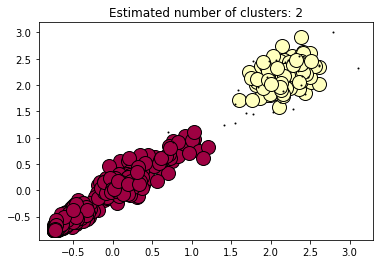

In [19]:
# Visulization
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Xdb[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Xdb[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# AGNES

In [20]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# for month 

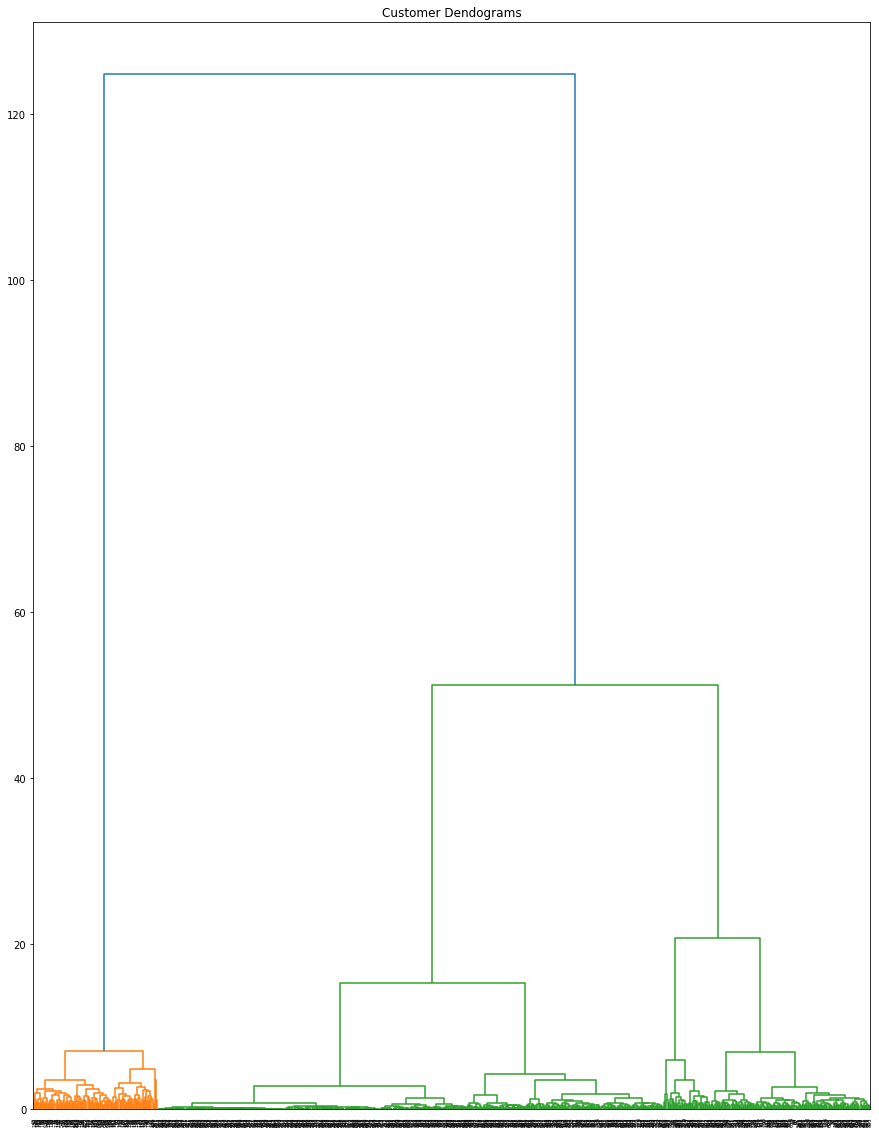

In [21]:
data = StandardScaler().fit_transform(dataMonth)

plt.figure(figsize=(15, 20))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [43]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_cluster=cluster.fit_predict(scaled_data)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

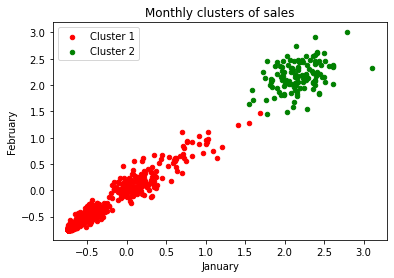

In [31]:
plt.scatter(scaled_data[y_cluster == 0]['January'], scaled_data[y_cluster == 0]['February'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_data[y_cluster == 1]['January'], scaled_data[y_cluster == 1]['February'], s = 20, c = 'green', label = 'Cluster 2')
plt.title('Monthly clusters of sales')
plt.xlabel('January')
plt.ylabel('February')
plt.legend()
plt.show()

# for week

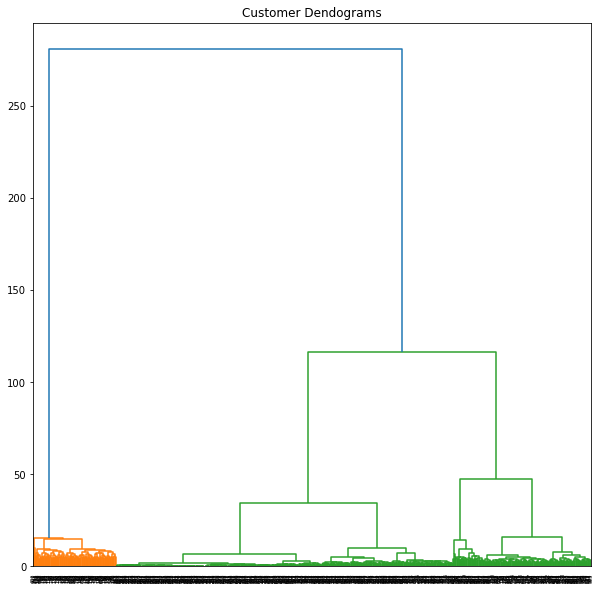

In [53]:
data = StandardScaler().fit_transform(X)

plt.figure(figsize=(10, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [45]:
scaler = StandardScaler()
scaled_data_weekly = pd.DataFrame(scaler.fit_transform(X))
scaled_data_weekly.columns = X.columns

In [46]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_cluster = cluster.fit_predict(scaled_data_weekly)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

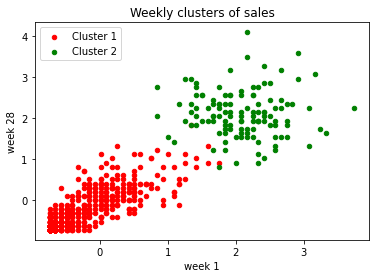

In [55]:
plt.scatter(scaled_data_weekly[y_cluster == 0]['W0'], scaled_data_weekly[y_cluster == 0]['W27'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_data_weekly[y_cluster == 1]['W0'], scaled_data_weekly[y_cluster == 1]['W27'], s = 20, c = 'green', label = 'Cluster 2')
plt.title('Weekly clusters of sales')
plt.xlabel('week 1')
plt.ylabel('week 28')
plt.legend()
plt.show()